In [ ]:
# The individual exercise is bellow the example of the Tutoring session.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

SEED = 42
np.random.seed(SEED)


# Load dataset
url_pima = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url_pima, header=None, names=column_names)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


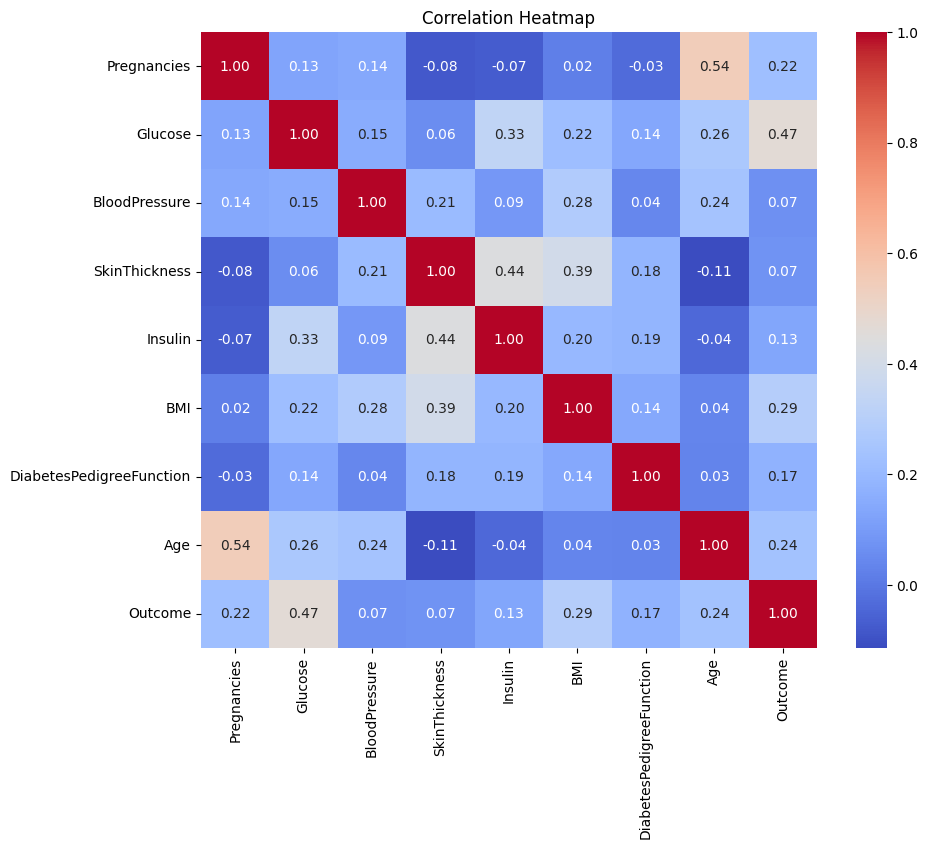

In [3]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [5]:
# Division y escalamiento de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=SEED, stratify=y)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [7]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

resultados = {}

nb_model = GaussianNB()
resultados['Naive Bayes'] = evaluate_model(nb_model, x_train, x_test, y_train, y_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
resultados['KNN'] = evaluate_model(knn_model, x_train, x_test, y_train, y_test)

log_model = LogisticRegression(solver='liblinear', random_state=SEED)
resultados['Logistic Regression'] = evaluate_model(log_model, x_train, x_test, y_train, y_test)

tree_model = DecisionTreeClassifier(random_state=SEED)
resultados['Decision Tree'] = evaluate_model(tree_model, x_train, x_test, y_train, y_test)

df_resultados = pd.DataFrame(list(resultados.items()), columns=['Model', 'Accuracy'])
df_resultados = df_resultados.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
df_resultados



,Model,Accuracy
0,Decision Tree,0.761905
1,Naive Bayes,0.744589
2,Logistic Regression,0.744589
3,KNN,0.714286


In [10]:
# Breast Cancer Wisconsin Dataset
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
cancer = load_breast_cancer()
data_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_cancer['target'] = cancer.target
# Visualizar os dados
data_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
# wine dataset
url_wine = " https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data_wine = pd.read_csv(url_wine, sep=';')
data_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
# Check for missing values
data_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
# Multiclass classsification models: KNN, Decision Tree, Random Forest, Logistic Regression
# We will compare the models based on accuracy
from sklearn.ensemble import RandomForestClassifier

x_wine = data_wine.drop('quality', axis=1)
y_wine = data_wine['quality']

# Split and scale the data
xw_train, xw_test, yw_train, yw_test = train_test_split(x_wine, y_wine, test_size=0.3, random_state=SEED, stratify=y_wine)
scaler_wine = StandardScaler()
xw_train = scaler_wine.fit_transform(xw_train)
xw_test = scaler_wine.transform(xw_test)

def evaluate_model_multiclass(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

resultados_wine = {}
knn_wine_model = KNeighborsClassifier(n_neighbors=5)
resultados_wine['KNN'] = evaluate_model_multiclass(knn_wine_model, xw_train, xw_test, yw_train, yw_test)

tree_wine_model = DecisionTreeClassifier(random_state=SEED)
resultados_wine['Decision Tree'] = evaluate_model_multiclass(tree_wine_model, xw_train, xw_test, yw_train, yw_test)

log_wine_model = LogisticRegression(solver='liblinear', random_state=SEED, multi_class='ovr')
resultados_wine['Logistic Regression'] = evaluate_model_multiclass(log_wine_model, xw_train, xw_test, yw_train, yw_test)

random_forest_model = RandomForestClassifier(random_state=SEED)
resultados_wine['Random Forest'] = evaluate_model_multiclass(random_forest_model, xw_train, xw_test, yw_train, yw_test)

df_resultados_wine = pd.DataFrame(list(resultados_wine.items()), columns=['Model', 'Accuracy'])
df_resultados_wine = df_resultados_wine.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
df_resultados_wine


/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,Model,Accuracy
0,Random Forest,0.652083
1,Logistic Regression,0.589583
2,KNN,0.585417
3,Decision Tree,0.575000


In [16]:
# Since we got poor accuracy, we can try to improve it using hyperparameter tuning or ensemble methods.

# Models: KNN, Decision Tree, Random Forest, Logistic Regression
# Hyperparameter tuning with GridSearchCV or RandomizedSearchCV can be applied here to improve model performance.

from sklearn.model_selection import GridSearchCV
# Example of hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=SEED), param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_search.fit(xw_train, yw_train)
best_rf_model = grid_search.best_estimator_
best_accuracy = evaluate_model_multiclass(best_rf_model, xw_train, xw_test, yw_train, yw_test)
print(f"Best Random Forest Model Accuracy after Hyperparameter Tuning: {best_accuracy}")

Best Random Forest Model Accuracy after Hyperparameter Tuning: 0.6520833333333333


In [17]:
# Example of hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_knn.fit(xw_train, yw_train)
best_knn_model = grid_search_knn.best_estimator_
best_knn_accuracy = evaluate_model_multiclass(best_knn_model, xw_train, xw_test, yw_train, yw_test)
print(f"Best KNN Model Accuracy after Hyperparameter Tuning: {best_knn_accuracy}")

Best KNN Model Accuracy after Hyperparameter Tuning: 0.6625


In [18]:
# Example of hyperparameter tuning for Decision Tree
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
grid_search_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=SEED), param_grid=param_grid_tree, cv=3, n_jobs=-1, scoring='accuracy')   
grid_search_tree.fit(xw_train, yw_train)
best_tree_model = grid_search_tree.best_estimator_
best_tree_accuracy = evaluate_model_multiclass(best_tree_model, xw_train, xw_test, yw_train, yw_test)
print(f"Best Decision Tree Model Accuracy after Hyperparameter Tuning: {best_tree_accuracy}")

Best Decision Tree Model Accuracy after Hyperparameter Tuning: 0.5604166666666667


In [19]:
# Example of hyperparameter tuning for logistic regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'multi_class': ['ovr', 'multinomial']
}
grid_search_log = GridSearchCV(estimator=LogisticRegression(random_state=SEED), param_grid=param_grid_log, cv=3, n_jobs=-1, scoring='accuracy')
grid_search_log.fit(xw_train, yw_train)
best_log_model = grid_search_log.best_estimator_
best_log_accuracy = evaluate_model_multiclass(best_log_model, xw_train, xw_test, yw_train, yw_test)
print(f"Best Logistic Regression Model Accuracy after Hyperparameter Tuning: {best_log_accuracy}")

/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this

Best Logistic Regression Model Accuracy after Hyperparameter Tuning: 0.6020833333333333


/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/equ

In [20]:
# Even with hyperparameter tuning, the accuracy may still be limited by the dataset itself. We can try to group quality scores into broader categories to improve classification performance.
# We will categorize wine quality into three classes: low (3-4), medium (5-6), and high (7-8).
def categorize_quality(quality):
    if quality <= 4:
        return 0  # low
    elif quality <= 6:
        return 1  # medium
    else:
        return 2  # high
data_wine['quality_cat'] = data_wine['quality'].apply(categorize_quality)
x_wine_cat = data_wine.drop(['quality', 'quality_cat'], axis=1)
y_wine_cat = data_wine['quality_cat']   
xw_cat_train, xw_cat_test, yw_cat_train, yw_cat_test = train_test_split(x_wine_cat, y_wine_cat, test_size=0.3, random_state=SEED, stratify=y_wine_cat)
scaler_wine_cat = StandardScaler()
xw_cat_train = scaler_wine_cat.fit_transform(xw_cat_train)
xw_cat_test = scaler_wine_cat.transform(xw_cat_test)
resultados_wine_cat = {}
knn_wine_cat_model = KNeighborsClassifier(n_neighbors=5)
resultados_wine_cat['KNN'] = evaluate_model_multiclass(knn_wine_cat_model, xw_cat_train, xw_cat_test, yw_cat_train, yw_cat_test)
tree_wine_cat_model = DecisionTreeClassifier(random_state=SEED)
resultados_wine_cat['Decision Tree'] = evaluate_model_multiclass(tree_wine_cat_model, xw_cat_train, xw_cat_test, yw_cat_train, yw_cat_test)
log_wine_cat_model = LogisticRegression(solver='liblinear', random_state=SEED, multi_class='ovr')
resultados_wine_cat['Logistic Regression'] = evaluate_model_multiclass(log_wine_cat_model, xw_cat_train, xw_cat_test, yw_cat_train, yw_cat_test)
random_forest_cat_model = RandomForestClassifier(random_state=SEED)
resultados_wine_cat['Random Forest'] = evaluate_model_multiclass(random_forest_cat_model, xw_cat_train, xw_cat_test, yw_cat_train, yw_cat_test)
df_resultados_wine_cat = pd.DataFrame(list(resultados_wine_cat.items()), columns=['Model', 'Accuracy'])
df_resultados_wine_cat = df_resultados_wine_cat.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
df_resultados_wine_cat

/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/equina/Documents/SIC/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,Model,Accuracy
0,Random Forest,0.872917
1,Logistic Regression,0.841667
2,KNN,0.822917
3,Decision Tree,0.797917


In [22]:
# We choose random forest as the best model for this multiclass classification task based on accuracy.
# The accuracy improved after categorizing the quality scores into broader classes.
# Let's print some predictions
y_pred_final = random_forest_cat_model.predict(xw_cat_test)
print("Predicted classes for the test set:", y_pred_final[:10])

Predicted classes for the test set: [1 1 1 1 1 1 1 1 1 1]


/var/folders/3c/z87p2q816b55gkkf_05bzyhr0000gn/T/ipykernel_4239/3927100174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_final, palette='viridis')


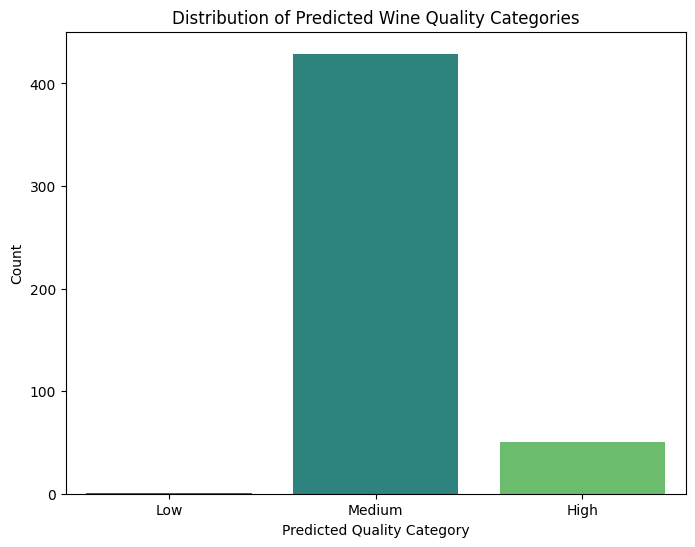

In [26]:
# Further evaluation using classification report and confusion matrix can be performed here to get more insights into model performance.
# Distribution of predicted classes
plt.figure(figsize=(8, 6))
sns.countplot(x=y_pred_final, palette='viridis')
plt.xticks(ticks=[0, 1, 2], labels=['Low', 'Medium', 'High'])
plt.title('Distribution of Predicted Wine Quality Categories')
plt.xlabel('Predicted Quality Category')
plt.ylabel('Count')
plt.show()




In [ ]:
# Note that the dataset is highly imbalanced, which can affect model performance when performing multiclass classification.

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.89      0.96      0.93       396
           2       0.74      0.57      0.64        65

    accuracy                           0.87       480
   macro avg       0.54      0.51      0.52       480
weighted avg       0.83      0.87      0.85       480



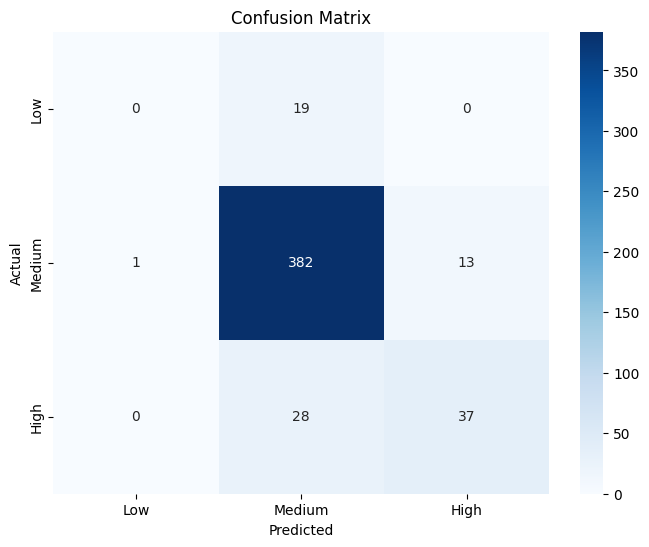

In [25]:

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(yw_cat_test, y_pred_final))
cm = confusion_matrix(yw_cat_test, y_pred_final)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()